In [32]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings("ignore") #uyarları kapatmak için kullanıldı 


In [33]:
nodes = pd.read_csv("InputFileNodes.csv") # ID sütunu düğüm isimleri olacak
#nodes: id, media, media.type, type.label, audience.size
edges = pd.read_csv("InputFileEdges.csv") #from ve to sütunları kenarları oluşturacak

# edges: from, to, weight, type

In [34]:
nodes.head(5)

,id,media,media.type,type.label,audience.size
0,s01,NY Times,1,Newspaper,20
1,s02,Washington Post,1,Newspaper,25
2,s03,Wall Street Journal,1,Newspaper,30
3,s04,USA Today,1,Newspaper,32
4,s05,LA Times,1,Newspaper,20


In [35]:
edges.head(5)

,from,to,weight,type
0,s01,s02,10,hyperlink
1,s01,s02,12,hyperlink
2,s01,s03,22,hyperlink
3,s01,s04,21,hyperlink
4,s04,s11,22,mention


In [36]:
# 3) Tekrar eden kenarlar birleştirilecek
# Yönsüz olduğu için (a,b) ve (b,a) aynı kabul edilecek
edges_ud = edges.copy()
edges_ud["u"] = edges_ud[["from", "to"]].min(axis=1)
edges_ud["v"] = edges_ud[["from", "to"]].max(axis=1)
# Aynı (u,v) kenarını birleştir – ağırlıkları topla : 
edges_ud_grouped = (
    edges_ud.groupby(["u", "v"], as_index=False)
            .agg({"weight": "sum"})
)


In [37]:
edges_dir_grouped = (
    edges.groupby(["from", "to"], as_index=False)
         .agg({"weight": "sum"})
)

Yönsüz G düğüm sayısı: 17
Yönsüz G kenar sayısı: 38


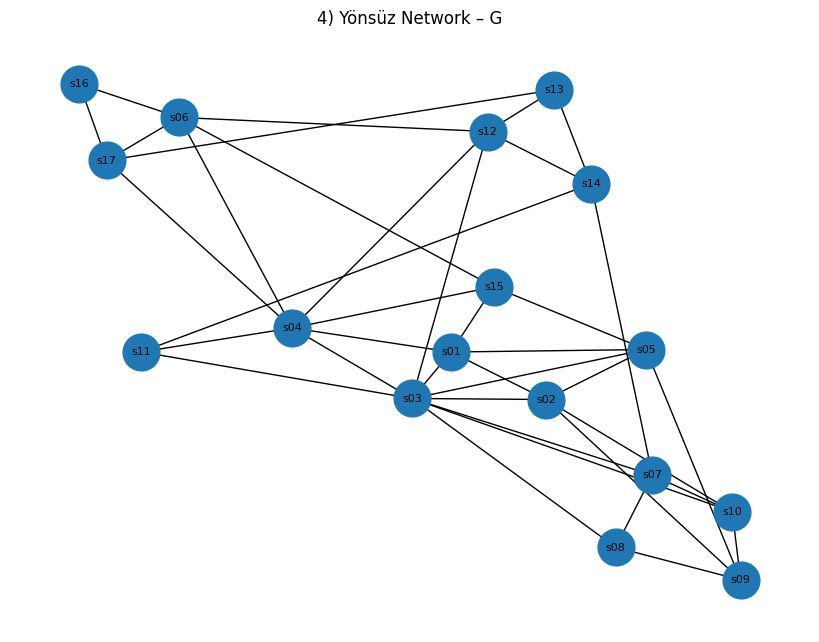

In [38]:
#Yönsüz Network oluşturulacak ve çizdilecek (network ismi G)
G = nx.Graph()
for _, row in nodes.iterrows():
    G.add_node(row["id"], media=row["media"])

# Kenarları ekle
for _, row in edges_ud_grouped.iterrows():
    G.add_edge(row["u"], row["v"], weight=row["weight"])

print("Yönsüz G düğüm sayısı:", G.number_of_nodes())
print("Yönsüz G kenar sayısı:", G.number_of_edges())

# Çizim
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=700, font_size=8)
plt.title("4) Yönsüz Network – G")
plt.show()

Yönlü G_directed düğüm sayısı: 17
Yönlü G_directed kenar sayısı: 48


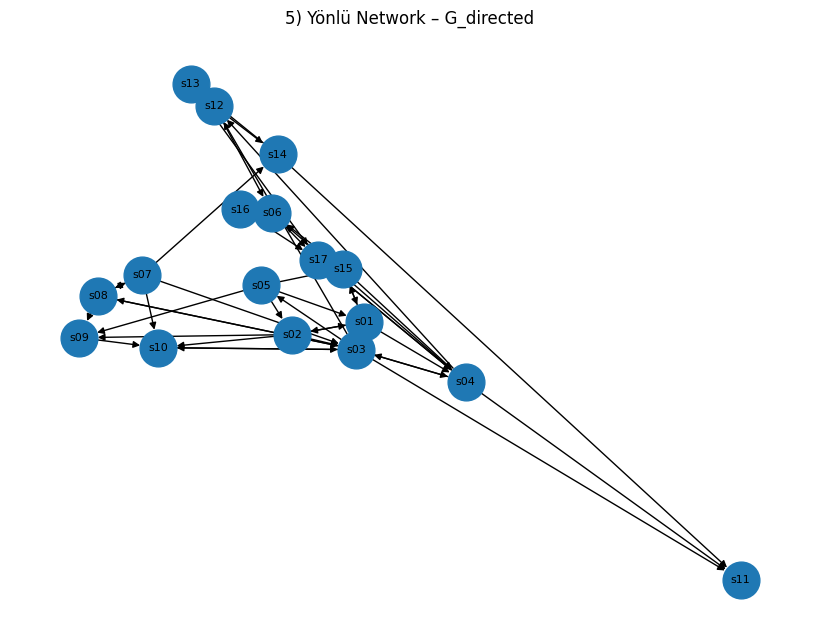

In [39]:
G_directed = nx.DiGraph()

for _, row in nodes.iterrows():
    G_directed.add_node(row["id"])

for _, row in edges_dir_grouped.iterrows():
    G_directed.add_edge(row["from"], row["to"], weight=row["weight"])

print("Yönlü G_directed düğüm sayısı:", G_directed.number_of_nodes())
print("Yönlü G_directed kenar sayısı:", G_directed.number_of_edges())

plt.figure(figsize=(8, 6))
pos2 = nx.spring_layout(G_directed, seed=42)
nx.draw(G_directed, pos2, with_labels=True, node_size=700, font_size=8, arrows=True)
plt.title("5) Yönlü Network – G_directed")
plt.show()

In [40]:
#network için tüm düğümlerin dereceleri listelenecek
degrees = dict(G.degree())
print("\n6) Dereceler:")
for n, d in degrees.items():
    print(f"{n}: {d}")
print("Derece – Derecesi yüksek olan düğümler ağın en fazla bağlantıya sahip merkez noktalarıdır.– Bu düğümler bilgi yayılımında kritik rol oynar")


6) Dereceler:
s01: 5
s02: 5
s03: 9
s04: 7
s05: 5
s06: 5
s07: 4
s08: 3
s09: 4
s10: 4
s11: 3
s12: 5
s13: 3
s14: 4
s15: 4
s16: 2
s17: 4
Derece – Derecesi yüksek olan düğümler ağın en fazla bağlantıya sahip merkez noktalarıdır.– Bu düğümler bilgi yayılımında kritik rol oynar


In [41]:
#Ortalama derece
avg_degree = sum(degrees.values()) / G.number_of_nodes()
print("\n7) Ortalama derece:", avg_degree)
print(" Ortalama derece:Ağın ne kadar yoğun olduğunu gösterir.Yüksek ise düğümler birbirine oldukça bağlıdır")


7) Ortalama derece: 4.470588235294118
 Ortalama derece:Ağın ne kadar yoğun olduğunu gösterir.Yüksek ise düğümler birbirine oldukça bağlıdır


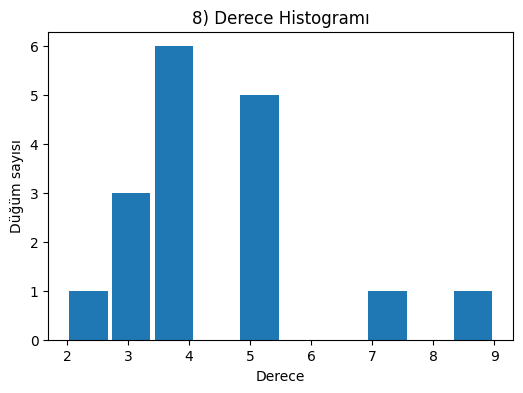

 Derece histogramı: Ağın scale-free (hub yapılı) olup olmadığını anlamamızı sağlar


In [42]:
# 8) Derece histogramı çizdirilecek
plt.figure(figsize=(6, 4))
plt.hist(list(degrees.values()), bins=10, rwidth=0.9)
plt.title("8) Derece Histogramı")
plt.xlabel("Derece")
plt.ylabel("Düğüm sayısı")
plt.show()
print( " Derece histogramı: Ağın scale-free (hub yapılı) olup olmadığını anlamamızı sağlar")

In [43]:
#Degree centrality
deg_c = nx.degree_centrality(G)
print("\n9) Degree Centrality:")
for n, v in deg_c.items():
    print(f"{n}: {v:.4f}")
print("Degree Centrality:Bağlantı sayısına göre düğümün önemini gösterir.En yüksek değerli düğümler hub'dır.")


9) Degree Centrality:
s01: 0.3125
s02: 0.3125
s03: 0.5625
s04: 0.4375
s05: 0.3125
s06: 0.3125
s07: 0.2500
s08: 0.1875
s09: 0.2500
s10: 0.2500
s11: 0.1875
s12: 0.3125
s13: 0.1875
s14: 0.2500
s15: 0.2500
s16: 0.1250
s17: 0.2500
Degree Centrality:Bağlantı sayısına göre düğümün önemini gösterir.En yüksek değerli düğümler hub'dır.


In [44]:
# 10) Closeness centrality
clo_c = nx.closeness_centrality(G)
print("\n10) Closeness Centrality:")
for n, v in clo_c.items():
    print(f"{n}: {v:.4f}")
print("Diğer düğümlere en kısa mesafeye sahip düğümleri gösterir.Yani bilgiye hızlı ulaşan düğümler.")


10) Closeness Centrality:
s01: 0.5333
s02: 0.4848
s03: 0.6667
s04: 0.6154
s05: 0.5161
s06: 0.5000
s07: 0.4848
s08: 0.4571
s09: 0.4103
s10: 0.4706
s11: 0.5161
s12: 0.5714
s13: 0.4324
s14: 0.4706
s15: 0.4848
s16: 0.3556
s17: 0.4571
Diğer düğümlere en kısa mesafeye sahip düğümleri gösterir.Yani bilgiye hızlı ulaşan düğümler.


In [45]:
# 11) Betweenness centrality

bet_c = nx.betweenness_centrality(G)
print("\n11) Betweenness Centrality:")
for n, v in bet_c.items():
    print(f"{n}: {v:.4f}")
print("En çok aracı/ köprü görevi gören düğümler.Topluluklar arasında bağlantı sağlar.")


11) Betweenness Centrality:
s01: 0.0391
s02: 0.0260
s03: 0.3404
s04: 0.1957
s05: 0.0655
s06: 0.1002
s07: 0.0503
s08: 0.0196
s09: 0.0174
s10: 0.0258
s11: 0.0179
s12: 0.1227
s13: 0.0211
s14: 0.0492
s15: 0.0562
s16: 0.0000
s17: 0.0529
En çok aracı/ köprü görevi gören düğümler.Topluluklar arasında bağlantı sağlar.


In [46]:
#12) Eigenvector centrality
# ============================================================
eig_c = nx.eigenvector_centrality(G, max_iter=500)
print("\n12) Eigenvector Centrality:")
for n, v in eig_c.items():
    print(f"{n}: {v:.4f}")
print(" Önemli düğümlere bağlı olan düğümler daha önemlidir.Google PageRank benzeri mantık")


12) Eigenvector Centrality:
s01: 0.3191
s02: 0.2910
s03: 0.4485
s04: 0.3528
s05: 0.2926
s06: 0.2069
s07: 0.1936
s08: 0.1646
s09: 0.1916
s10: 0.2221
s11: 0.1869
s12: 0.2488
s13: 0.1065
s14: 0.1453
s15: 0.2313
s16: 0.0695
s17: 0.1453
 Önemli düğümlere bağlı olan düğümler daha önemlidir.Google PageRank benzeri mantık


In [47]:
# 13) Katz centrality
katz_c = nx.katz_centrality(G, alpha=0.1, beta=1.0)
print("\n13) Katz Centrality:")
for n, v in katz_c.items():
    print(f"{n}: {v:.4f}")
print("– Hem doğrudan hem dolaylı bağlantıları hesaba katar.Çok seviyeli önem ölçümü yapar.")


13) Katz Centrality:
s01: 0.2662
s02: 0.2585
s03: 0.3479
s04: 0.3038
s05: 0.2587
s06: 0.2443
s07: 0.2259
s08: 0.2055
s09: 0.2214
s10: 0.2313
s11: 0.2126
s12: 0.2566
s13: 0.1949
s14: 0.2150
s15: 0.2333
s16: 0.1721
s17: 0.2175
– Hem doğrudan hem dolaylı bağlantıları hesaba katar.Çok seviyeli önem ölçümü yapar.


In [48]:
# 14) PageRank centrality
pr = nx.pagerank(G)
print("\n14) PageRank:")
for n, v in pr.items():
    print(f"{n}: {v:.4f}")
print(" Önemli düğümlere giden bağlantılar daha yüksek değer üretir.Web sayfası sıralama mantığı.")


14) PageRank:
s01: 0.1032
s02: 0.0667
s03: 0.0862
s04: 0.0752
s05: 0.0379
s06: 0.0637
s07: 0.0613
s08: 0.0634
s09: 0.0445
s10: 0.0470
s11: 0.0245
s12: 0.0647
s13: 0.0601
s14: 0.0463
s15: 0.0514
s16: 0.0584
s17: 0.0453
 Önemli düğümlere giden bağlantılar daha yüksek değer üretir.Web sayfası sıralama mantığı.


In [49]:
# 15) Modularity hesaplanacak
from networkx.algorithms import community
comms = community.greedy_modularity_communities(G)
mod = community.modularity(G, comms)
print("\n15) Modularity:", mod)
print("Topluluk sayısı:", len(comms))
print(" Ağın kaç topluluğa ayrıldığını ölçer.Yüksek modularity → belirgin gruplar var demektir.")


15) Modularity: 0.3282340296757489
Topluluk sayısı: 3
 Ağın kaç topluluğa ayrıldığını ölçer.Yüksek modularity → belirgin gruplar var demektir.


In [50]:
# 16) Density hesaplanacak
dens = nx.density(G)
print("\n16) Density:", dens)
print("Ağdaki mevcut bağlantıların maksimum bağlantılara oranıdır.0'a yakın ise seyrek bir ağdır.")


16) Density: 0.27941176470588236
Ağdaki mevcut bağlantıların maksimum bağlantılara oranıdır.0'a yakın ise seyrek bir ağdır.


In [51]:
# 17) Average clustering hesaplanacak
avg_clust = nx.average_clustering(G)
print("\n17) Average Clustering:", avg_clust)
print(" Düğümlerin komşularının birbiriyle bağlantı kurma eğilimini ölçer.Yüksekse ağda üçgenler ve lokal bağlantı fazladır.")


17) Average Clustering: 0.4205882352941176
 Düğümlerin komşularının birbiriyle bağlantı kurma eğilimini ölçer.Yüksekse ağda üçgenler ve lokal bağlantı fazladır.


In [52]:
# 18) Diameter hesaplanacak
if nx.is_connected(G):
    dia = nx.diameter(G)
else:
    # En büyük bağlı bileşende hesapla
    largest_cc = max(nx.connected_components(G), key=len)
    dia = nx.diameter(G.subgraph(largest_cc))

print("\n18) Diameter:", dia)
print(" Ağdaki en uzak iki düğüm arasındaki mesafe.Küçükse bilgi akışı hızlıdır.")


18) Diameter: 4
 Ağdaki en uzak iki düğüm arasındaki mesafe.Küçükse bilgi akışı hızlıdır.



19) Derece Dağılımı:
Derece 2: 1 düğüm
Derece 3: 3 düğüm
Derece 4: 6 düğüm
Derece 5: 5 düğüm
Derece 7: 1 düğüm
Derece 9: 1 düğüm


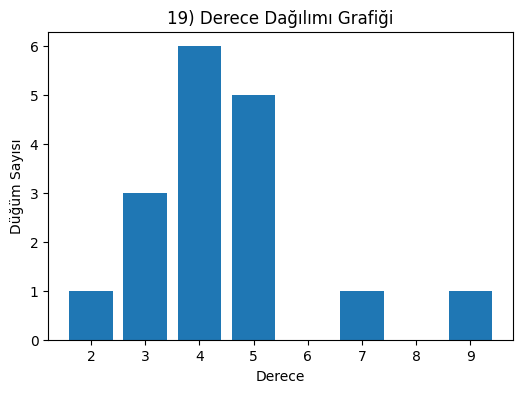

Düğümlerin büyük çoğunluğu düşük dereceli fakat birkaç düğüm yüksek dereceliyse 'hub' yapısı vardır.


In [56]:
# Derece dağılımı 
deg_values = list(degrees.values())
deg_count = Counter(deg_values)

print("\n19) Derece Dağılımı:")
for d, c in sorted(deg_count.items()):
    print(f"Derece {d}: {c} düğüm")

plt.figure(figsize=(6, 4))
plt.bar(deg_count.keys(), deg_count.values())
plt.title("19) Derece Dağılımı Grafiği")
plt.xlabel("Derece")
plt.ylabel("Düğüm Sayısı")
plt.show()

print("Düğümlerin büyük çoğunluğu düşük dereceli fakat birkaç düğüm yüksek dereceliyse 'hub' yapısı vardır.")

In [58]:
# ============================================================
# 21) G network için En Kritik 5 'Köprü' Düğümü
#     (Betweenness Centrality'ye göre)
# ============================================================

# Betweenness centrality hesapla (yönsüz ağ G için)
bet_c = nx.betweenness_centrality(G, normalized=True)

# Değerleri büyükten küçüğe sırala
bet_c_sorted = sorted(bet_c.items(), key=lambda x: x[1], reverse=True)

# En kritik 5 köprü düğümünü al
top5_bridge = bet_c_sorted[:5]

print("21) En Kritik 5 'Köprü' Düğümü (Betweenness Centrality):")
for node, val in top5_bridge:
    print(f"  {node}: {val:.4f}")



print("Bu 5 düğüm, ağdaki en kritik 'köprü' düğümleridir.")
print("Yani farklı bölgeler/topluluklar arasındaki en kısa yolların büyük kısmı bu düğümler üzerinden geçer.")
print("Bu düğümler kaldırılırsa ağ parçalanma ve bilgi akışının yavaşlaması beklenir.")


21) En Kritik 5 'Köprü' Düğümü (Betweenness Centrality):
  s03: 0.3404
  s04: 0.1957
  s12: 0.1227
  s06: 0.1002
  s05: 0.0655
Bu 5 düğüm, ağdaki en kritik 'köprü' düğümleridir.
Yani farklı bölgeler/topluluklar arasındaki en kısa yolların büyük kısmı bu düğümler üzerinden geçer.
Bu düğümler kaldırılırsa ağ parçalanma ve bilgi akışının yavaşlaması beklenir.


In [59]:
# ============================================================
# 22) G network için En Kritik 5 'Lider' Düğümü
#     (Eigenvector Centrality'ye göre)
# ============================================================

# Eigenvector centrality hesapla
eig_c = nx.eigenvector_centrality(G, max_iter=500)

# Değerleri büyükten küçüğe sırala
eig_c_sorted = sorted(eig_c.items(), key=lambda x: x[1], reverse=True)

# En kritik 5 lider düğümü al
top5_leader = eig_c_sorted[:5]

print("22) En Kritik 5 'Lider' Düğümü (Eigenvector Centrality):")
for node, val in top5_leader:
    print(f"  {node}: {val:.4f}")

print("Bu 5 düğüm, ağdaki en 'lider' düğümlerdir.")
print("Sadece çok bağlantıları olduğu için değil, aynı zamanda diğer önemli düğümlere bağlı oldukları için öne çıkarlar.")
print("Bu düğümler, ağın etki ve prestij merkezleri olarak yorumlanabilir.")


22) En Kritik 5 'Lider' Düğümü (Eigenvector Centrality):
  s03: 0.4485
  s04: 0.3528
  s01: 0.3191
  s05: 0.2926
  s02: 0.2910

[22-Yorum]
Bu 5 düğüm, ağdaki en 'lider' düğümlerdir.
Sadece çok bağlantıları olduğu için değil, aynı zamanda diğer önemli düğümlere bağlı oldukları için öne çıkarlar.
Bu düğümler, ağın etki ve prestij merkezleri olarak yorumlanabilir.


In [60]:
# ============================================================
# 22) G network için En Kritik 5 'Lider' Düğümü
#     (Eigenvector Centrality'ye göre)
# ============================================================

# Eigenvector centrality hesapla
eig_c = nx.eigenvector_centrality(G, max_iter=500)

# Değerleri büyükten küçüğe sırala
eig_c_sorted = sorted(eig_c.items(), key=lambda x: x[1], reverse=True)

# En kritik 5 lider düğümü al
top5_leader = eig_c_sorted[:5]

print("22) En Kritik 5 'Lider' Düğümü (Eigenvector Centrality):")
for node, val in top5_leader:
    print(f"  {node}: {val:.4f}")


print("Bu 5 düğüm, ağdaki en 'lider' düğümlerdir.")
print("Sadece çok bağlantıları olduğu için değil, aynı zamanda diğer önemli düğümlere bağlı oldukları için öne çıkarlar.")
print("Bu düğümler, ağın etki ve prestij merkezleri olarak yorumlanabilir.")


22) En Kritik 5 'Lider' Düğümü (Eigenvector Centrality):
  s03: 0.4485
  s04: 0.3528
  s01: 0.3191
  s05: 0.2926
  s02: 0.2910
Bu 5 düğüm, ağdaki en 'lider' düğümlerdir.
Sadece çok bağlantıları olduğu için değil, aynı zamanda diğer önemli düğümlere bağlı oldukları için öne çıkarlar.
Bu düğümler, ağın etki ve prestij merkezleri olarak yorumlanabilir.


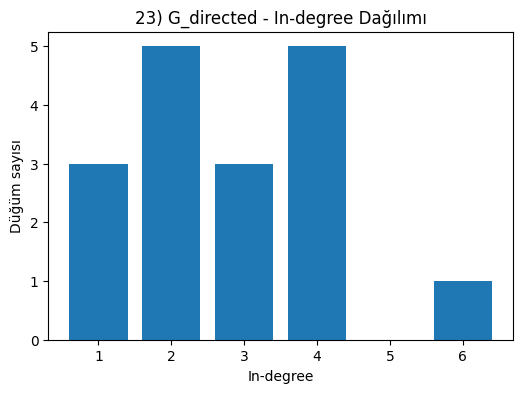

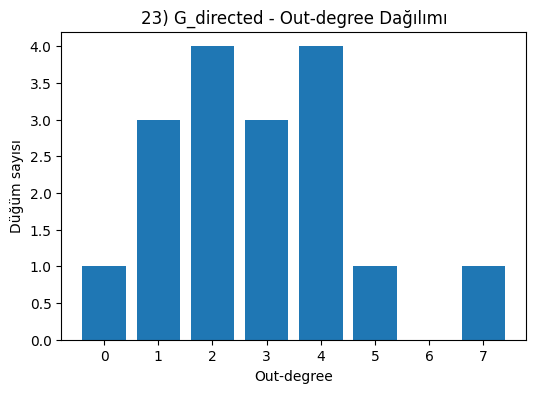

23) In-degree dağılımı:
  In-degree 1: 3 düğüm
  In-degree 2: 5 düğüm
  In-degree 3: 3 düğüm
  In-degree 4: 5 düğüm
  In-degree 6: 1 düğüm

23) Out-degree dağılımı:
  Out-degree 0: 1 düğüm
  Out-degree 1: 3 düğüm
  Out-degree 2: 4 düğüm
  Out-degree 3: 3 düğüm
  Out-degree 4: 4 düğüm
  Out-degree 5: 1 düğüm
  Out-degree 7: 1 düğüm
In-degree dağılımı, düğümlerin kaç kaynaktan bağlantı aldığını;
out-degree dağılımı ise düğümlerin kaç hedefe bağlantı verdiğini gösterir.
Eğer az sayıda düğümün in-degree veya out-degree değeri çok yüksekse,
bu düğümler yönlü ağda 'hub' veya bilgi yoğunlaşma noktalarıdır.


In [61]:
# ============================================================
# 23) G_directed network için derece dağılımı
#     (in-degree ve out-degree histogramları)
# ============================================================

# In-degree ve out-degree sözlükleri
in_degrees = dict(G_directed.in_degree())
out_degrees = dict(G_directed.out_degree())

# Sadece değer listeleri
in_values = list(in_degrees.values())
out_values = list(out_degrees.values())

# In-degree histogramı
plt.figure(figsize=(6, 4))
plt.hist(in_values, bins=range(min(in_values), max(in_values) + 2), align="left", rwidth=0.8)
plt.title("23) G_directed - In-degree Dağılımı")
plt.xlabel("In-degree")
plt.ylabel("Düğüm sayısı")
plt.show()

# Out-degree histogramı
plt.figure(figsize=(6, 4))
plt.hist(out_values, bins=range(min(out_values), max(out_values) + 2), align="left", rwidth=0.8)
plt.title("23) G_directed - Out-degree Dağılımı")
plt.xlabel("Out-degree")
plt.ylabel("Düğüm sayısı")
plt.show()

# Derece dağılımını konsola da yazdıralım (özet açısından)
from collections import Counter

in_count = Counter(in_values)
out_count = Counter(out_values)

print("23) In-degree dağılımı:")
for d, c in sorted(in_count.items()):
    print(f"  In-degree {d}: {c} düğüm")

print("\n23) Out-degree dağılımı:")
for d, c in sorted(out_count.items()):
    print(f"  Out-degree {d}: {c} düğüm")

print("In-degree dağılımı, düğümlerin kaç kaynaktan bağlantı aldığını;")
print("out-degree dağılımı ise düğümlerin kaç hedefe bağlantı verdiğini gösterir.")
print("Eğer az sayıda düğümün in-degree veya out-degree değeri çok yüksekse,")
print("bu düğümler yönlü ağda 'hub' veya bilgi yoğunlaşma noktalarıdır.")


24) En güçlü 3 düğüm (dereceye göre):
  s03: degree = 9
  s04: degree = 7
  s01: degree = 5


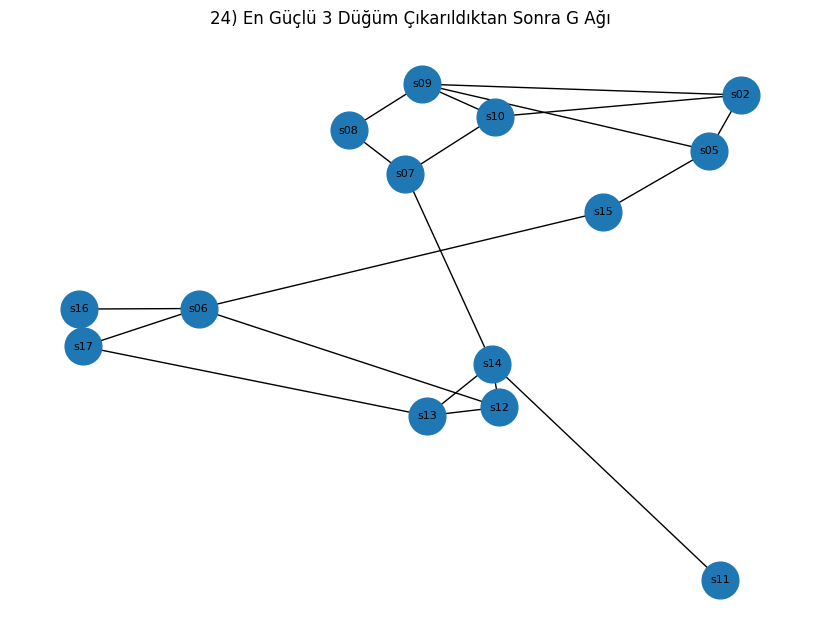


24) Ağ istatistikleri (önce / sonra):
  Düğüm sayısı: 17  -->  14
  Kenar sayısı: 38   -->  20
  Bağlı bileşen sayısı: 1  -->  1
En güçlü 3 düğüm ['s03', 's04', 's01'] ağdan çıkarıldığında:
- Düğüm ve kenar sayısında belirgin bir azalma görülür.
- Bağlı bileşen sayısının artması, ağın daha parçalı hale geldiğini gösterir.
Bu durum, bu 3 düğümün ağın omurgasında, toplulukları birbirine bağlayan
kritik merkezler olduğunu ve kaldırıldıklarında bilgi akışının zorlaştığını gösterir.


In [62]:
# ============================================================
# 24) G network için en güçlü 3 düğümü bularak ağdan kaldırınız
#     ve oluşan yeni ağı çizdirerek değişimi yorumlayınız.
# ============================================================

# 1) En güçlü 3 düğümü dereceye göre bul (degree centrality / degree)
deg_values = dict(G.degree())
deg_sorted = sorted(deg_values.items(), key=lambda x: x[1], reverse=True)
top3_nodes = [n for n, d in deg_sorted[:3]]

print("24) En güçlü 3 düğüm (dereceye göre):")
for n, d in deg_sorted[:3]:
    print(f"  {n}: degree = {d}")

# 2) Orijinal ağ istatistikleri
nodes_before = G.number_of_nodes()
edges_before = G.number_of_edges()
components_before = nx.number_connected_components(G)

# 3) Bu düğümleri kaldırılmış yeni ağ oluştur
G_removed = G.copy()
G_removed.remove_nodes_from(top3_nodes)

nodes_after = G_removed.number_of_nodes()
edges_after = G_removed.number_of_edges()
components_after = nx.number_connected_components(G_removed)

# 4) Yeni ağı çiz
plt.figure(figsize=(8, 6))
pos_removed = nx.spring_layout(G_removed, seed=42)
nx.draw(G_removed, pos_removed, with_labels=True, node_size=700, font_size=8)
plt.title("24) En Güçlü 3 Düğüm Çıkarıldıktan Sonra G Ağı")
plt.show()

# 5) Sonuçları yazdır
print("\n24) Ağ istatistikleri (önce / sonra):")
print(f"  Düğüm sayısı: {nodes_before}  -->  {nodes_after}")
print(f"  Kenar sayısı: {edges_before}   -->  {edges_after}")
print(f"  Bağlı bileşen sayısı: {components_before}  -->  {components_after}")

print(f"En güçlü 3 düğüm {top3_nodes} ağdan çıkarıldığında:")
print("- Düğüm ve kenar sayısında belirgin bir azalma görülür.")
print("- Bağlı bileşen sayısının artması, ağın daha parçalı hale geldiğini gösterir.")
print("Bu durum, bu 3 düğümün ağın omurgasında, toplulukları birbirine bağlayan")
print("kritik merkezler olduğunu ve kaldırıldıklarında bilgi akışının zorlaştığını gösterir.")
